### Read in RMSE data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
df = pd.DataFrame(pd.read_csv("cosine_rmse3.txt", sep=" "))
#df=df[df['lengthscale']<=0.3]
df.shape

(1560, 4)

### Make data frame in order

In [ ]:
order = pd.DataFrame(pd.read_csv("cosine_rmse2.txt", sep=" "))
order = order.sort_values(by=['lengthscale', 'l2regularizer'])
order = order.reset_index(drop=True)
with open("cosine_rmse3.txt", 'a') as f:
    dfAsString = order.to_string(header=False, index=False)
    f.write(dfAsString)
order

In [ ]:
# # find the missing one
# for i in np.unique(df['lengthscale']):
#     #print exact lengthscale dataframe's shape
#     print(df[df['lengthscale']==i].shape)
# print(df[df['lengthscale']==0.900])

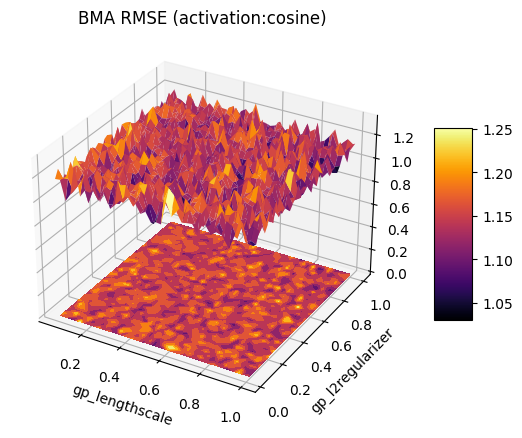

In [4]:
fig = plt.figure(figsize= (10,5))
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_mean_plot))
# show plot
plt.show()

In [5]:
df[df['rmse_mean']==np.min(df['rmse_mean'])]

,lengthscale,l2regularizer,rmse_mean,rmse_std
886,0.6,0.175,0.948906,0.410639


In [47]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()

<IPython.core.display.Javascript object>

In [48]:
df = pd.DataFrame(pd.read_csv("bma_relu_rmse.txt", sep=" "))
df.shape

(1560, 4)

In [49]:
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE (activation:relu)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_mean_plot))
# show plot
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
df[df['rmse_mean']==np.min(df['rmse_mean'])]

In [50]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std (activation:relu)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()

<IPython.core.display.Javascript object>